In [1]:
import os
from keras.models import Model 
import numpy as np  
import tensorflow as tf  
from glob import glob   
import time  
from PIL import Image  
import shutil
from collections import Counter
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt 
from random import randint

In [2]:
#Train Paths
covid_paths = glob('C:/Users/Research6/Desktop/conf/New exp/train/Covid/**')
print(len(covid_paths))
Normal_paths = glob('C:/Users/Research6/Desktop/conf/New exp/train/Normal/**')
print(len(Normal_paths))
ViralPneumonia_paths = glob('C:/Users/Research6/Desktop/conf/New exp/train/Viral Pneumonia/**')
print(len(ViralPneumonia_paths))

111
70
70


In [3]:
#Test Paths
covid_test_paths = glob('C:/Users/Research6/Desktop/conf/New exp/test/Covid/**')
print(len(covid_test_paths))
Normal_test_paths = glob('C:/Users/Research6/Desktop/conf/New exp/test/Normal/**')
print(len(Normal_test_paths))
ViralPneumonia_test_paths = glob('C:/Users/Research6/Desktop/conf/New exp/test/Viral Pneumonia/**')
print(len(ViralPneumonia_test_paths))

26
20
20


In [4]:
Classes = 3
# LR = 0.003 
LR = 0.001
# LR =  1e-07 
epoch = 100
#experiment_Name = "Smote_1_FMNIST"

In [5]:
image_dimensions = 32
import cv2 
data_train = [] 
label_train = [] 
# number_of_images
# for c,n,v in zip(covid_paths,Normal_paths,ViralPneumonia_paths):
for c in (covid_paths):
  data_train.append(cv2.resize(cv2.imread(c),(image_dimensions,image_dimensions)))
  label_train.append(0)
for n in (Normal_paths):    
  data_train.append(cv2.resize(cv2.imread(n),(image_dimensions,image_dimensions)))
  label_train.append(1)
for v in (ViralPneumonia_paths):
  data_train.append(cv2.resize(cv2.imread(v),(image_dimensions,image_dimensions)))
  label_train.append(2)

In [6]:
len(data_train)

251

In [7]:
len(covid_paths + Normal_paths + ViralPneumonia_paths )

251

In [8]:
image_dimensions = 32
import cv2 
data_test = [] 
label_test = [] 
# number_of_images
for c in (covid_test_paths):
  data_test.append(cv2.resize(cv2.imread(c),(image_dimensions,image_dimensions)))
  label_test.append(0)
for n in (Normal_test_paths):    
  data_test.append(cv2.resize(cv2.imread(n),(image_dimensions,image_dimensions)))
  label_test.append(1)
for v in (ViralPneumonia_test_paths):
  data_test.append(cv2.resize(cv2.imread(v),(image_dimensions,image_dimensions)))
  label_test.append(2)
    

In [9]:
x_train = data_train[:]
y_train =  label_train[:]

x_test = data_test[:]
y_test =  label_test[:]

In [10]:
len(x_train)

251

In [11]:
len(x_test)

66

In [12]:
label_list = [i for i in range(Classes)]
label_list

[0, 1, 2]

C:\Users\Research6\.conda\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

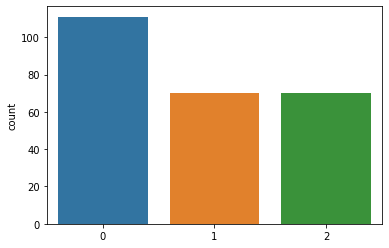

In [13]:
import seaborn as sns 
sns.countplot(np.array(y_train))

In [14]:
def create_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, [3, 3], activation='relu', input_shape=(32,32,3)))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten()
    )
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(3))
    return model


model = create_classical_model()



optimizer = tf.keras.optimizers.Adam(LR)
# optimizer.learning_rate.assign(0.00001)





model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])



# upto = int(min_working_no *.7)
# print(upto)
history2 = model.fit(np.array(x_train),
        np.array(y_train),
        epochs=100,
        )


Epoch 1/100
8/8 [==============================] - 26s 26ms/step - loss: 96.2608 - accuracy: 0.4223
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 4.0597 - accuracy: 0.5578
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6858 - accuracy: 0.8167
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5043 - accuracy: 0.8367
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3811 - accuracy: 0.8725
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2186 - accuracy: 0.9203
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2002 - accuracy: 0.9402
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1625 - accuracy: 0.9482
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0870 - accuracy: 0.9761
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0566 - accuracy: 0.9841
Epoch 11/100
8/8 [========

In [15]:
"accuracy >> {}".format(model.evaluate(np.array(x_test), np.array(y_test), verbose=0)[1]) 

'accuracy >> 0.8939393758773804'

In [16]:
y_prob = model.predict(np.array(x_test)) 
y_classes = y_prob.argmax(axis=-1)

In [17]:
from sklearn.metrics import classification_report


# report = classification_report(np.array(y_test), np.array(predictions).argmax(axis=-1))
# print(report)
report = classification_report(y_test, y_classes)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.82      0.90      0.86        20
           2       0.85      0.85      0.85        20

    accuracy                           0.89        66
   macro avg       0.89      0.89      0.89        66
weighted avg       0.90      0.89      0.90        66



In [18]:
import sklearn.metrics

y_true = y_test
y_pred = y_classes

r = sklearn.metrics.confusion_matrix(y_true, y_pred)
print(r)

[[24  1  1]
 [ 0 18  2]
 [ 0  3 17]]


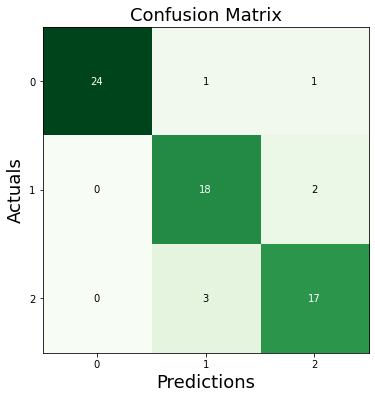

In [19]:
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
conf_matrix = sklearn.metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
 
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()